<a href="https://colab.research.google.com/github/gunwoof/AI-competition/blob/master/%EC%98%81%ED%99%94%20%EA%B4%80%EA%B0%9D%EC%88%98%20%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0(dacon)/%EC%98%81%ED%99%94%EA%B4%80%EA%B0%9D_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 및 라이브러리 로딩

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # 문자열을 숫자로 인코더
import numpy as np

train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

##데이터 설명

---
* title : 영화의 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영시간(분)
* screening_rat : 상영등급
* director : 감독이름
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
*   
dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor : 주연배우수
* box_off_num : 관객수

## 데이터탐색

In [ ]:
train.info()
print("\n")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   

*   해당 감독이 이전 영화의 평균 관객수에만 결측값이 있다.
*   test data의 column수가 train data의 column수보다 하나 부족하다. test data에는 y(box_off_nums)가 없기 때문이다

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## 데이터 분석

**주관적 분석**
1.   영화제목, 개봉일, 감독이름, 스태프 수, 주연배우 수는 관객 수와 관련 없어보인다 -> 제거를 고려
2.   유명한 배급사일 수록 관객수가 많겠지만, 배급사 이름 자체로는 관객 수와 관련 없어보인다 -> 제거를 고려




**해당 감독 이전 영화의 평균 관객수에 결측값이 있다. 감독이 첫 영화이므로 전 영화 관객수가 없기 때문이다 -> 결측값은 0으로 지정해야 한다**

In [ ]:
train[(train['dir_prev_bfnum'].isnull()) & (train['dir_prev_num'] == 0)].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [ ]:
train[(train['dir_prev_bfnum'].isnull()) & (train['dir_prev_num'] != 0)].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num


**관객수가 많은 영화의 시간은 100~140분에 집중분포되어 있음 -> 20단위로 인코딩을 해볼 계획이다**

(0.0, 15000000.0)

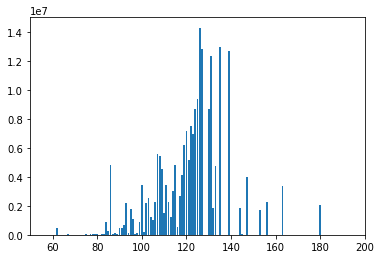

In [ ]:
plt.bar(train['time'], train['box_off_num'])
plt.xlim([50, 200])
plt.ylim([0, 15000000])

**상관분석 : 주관적인 분석으로 주연배우의 수는 관객수와 관련없다고 생각했는데, 상관분석을 통하여 제거의 정당성을 느낌 -> 주연배우의 수 제거**

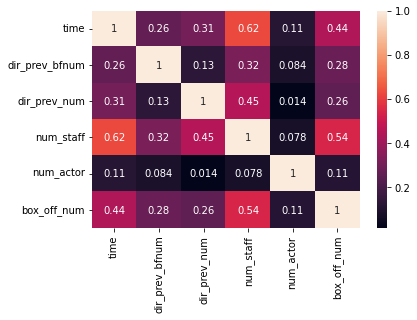

In [ ]:
train.corr()
sns.heatmap(train.corr(), annot = True)



## 데이터 전처리

**(영화제목, 개봉일, 감독이름, 스태프 수, 주연배우 수) + 배급사 이름 제거**

In [ ]:
train = train.drop(labels=['title','distributor','release_time','num_staff','num_actor','director'],axis = 1)
test = test.drop(labels=['title','distributor','release_time','num_staff','num_actor','director'],axis = 1)

In [ ]:
train.head()

,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,box_off_num
0,액션,3,청소년 관람불가,조병옥,NaN,0,23398
1,느와르,2,청소년 관람불가,우민호,1161602.50,2,7072501
2,액션,2,15세 관람가,장철수,220775.25,4,6959083
3,코미디,1,전체 관람가,구자홍,23894.00,2,217866
4,코미디,1,15세 관람가,신근호,1.00,1,483387


**해당 감독 이전 영화 평균 관객수의 결측값 0으로 만듬**

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace = True)
test['dir_prev_bfnum'].fillna(0, inplace = True)

In [ ]:
train[(train['dir_prev_bfnum']==0) & (train['dir_prev_num'] == 0)].head()

,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,box_off_num
0,액션,3,청소년 관람불가,조병옥,0.0,0,23398
6,다큐멘터리,1,전체 관람가,이창재,0.0,0,53526
8,뮤지컬,2,전체 관람가,정성복,0.0,0,4778
9,드라마,3,15세 관람가,변성현,0.0,0,868
10,멜로/로맨스,3,청소년 관람불가,조조 히데오,0.0,0,745


**'time' 인코딩**

*   1 : 100<=x<120
*   2: 120<=x<=140
*   3: 나머지


In [ ]:
# train set 인코딩
for i in range(len(train['time'])):
  if 100 <= (train['time'])[i] and (train['time'])[i] < 120:
    (train['time'])[i] = 1
  elif 120 <= (train['time'])[i] and (train['time'])[i] <= 140:
    (train['time'])[i] = 2
  else : 
    (train['time'])[i] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# test set 인코딩
for i in range(len(test['time'])):
  if 100 <= (test['time'])[i] and (test['time'])[i] < 120:
    (test['time'])[i] = 1
  elif 120 <= (test['time'])[i] and (test['time'])[i] <= 140:
    (test['time'])[i] = 2
  else : 
    (test['time'])[i] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
train.head()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,box_off_num
0,액션,3,청소년 관람불가,0.00,0,23398
1,느와르,2,청소년 관람불가,1161602.50,2,7072501
2,액션,2,15세 관람가,220775.25,4,6959083
3,코미디,1,전체 관람가,23894.00,2,217866
4,코미디,1,15세 관람가,1.00,1,483387


**장르와 관람나이를 정수로 인코딩**

In [ ]:
print(train['genre'].unique())
print(test['genre'].unique())

['액션' '느와르' '코미디' '다큐멘터리' '뮤지컬' '드라마' '멜로/로맨스' '공포' '서스펜스' '애니메이션' '미스터리'
 'SF']
['느와르' '멜로/로맨스' '드라마' '액션' '공포' '다큐멘터리' '코미디' '미스터리' '애니메이션' '서스펜스' '뮤지컬'
 'SF']


In [ ]:
encoder = LabelEncoder()
train_x = train.drop(['box_off_num'],axis= 1)
train_y = pd.DataFrame(train['box_off_num'])

# 문자열 인코딩
encoder.fit(train_x['genre'])
train_x['genre'] = encoder.transform(train_x['genre'])
encoder.fit(train_x['screening_rat'])
train_x['screening_rat'] = encoder.transform(train_x['screening_rat'])

encoder.fit(test['genre'])
test['genre'] = encoder.transform(test['genre'])
encoder.fit(test['screening_rat'])
test['screening_rat'] = encoder.transform(test['screening_rat'])

print(train_x)
print('\n')
print(test)

     genre  time  screening_rat  dir_prev_bfnum  dir_prev_num
0       10     3              3            0.00             0
1        2     2              3      1161602.50             2
2       10     2              1       220775.25             4
3       11     1              2        23894.00             2
4       11     1              1            1.00             1
..     ...   ...            ...             ...           ...
595      4     1              3         3833.00             1
596      4     2              1       496061.00             1
597      1     3              3            0.00             0
598      2     1              1            0.00             0
599     10     2              1            0.00             0

[600 rows x 5 columns]


     genre  time  screening_rat  dir_prev_bfnum  dir_prev_num
0        2     2              3    3.005290e+05             2
1        5     1              0    3.427002e+05             4
2        4     1              0    4.206611e

## 모델정의 및 학습

In [ ]:
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

# 학습 된 모델로 예측 데이터 생성

In [ ]:
pred = model.predict(test)

## 제출파일 생성

In [ ]:
submission = pd.read_csv('/content/submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
submission['box_off_num'] = pred

In [ ]:
submission

,title,box_off_num
0,용서는 없다,2.745020e+06
1,아빠가 여자를 좋아해,1.844363e+06
2,하모니,1.157431e+06
3,의형제,8.318318e+05
4,평행 이론,7.716636e+05
...,...,...
238,해에게서 소년에게,3.151827e+03
239,울보 권투부,1.473926e+04
240,어떤살인,1.207088e+06
241,말하지 못한 비밀,2.846107e+05


In [ ]:
submission.to_csv('베이스라인.csv',index = False)